# Примеры к лекции 13. БПФ.


Лекции по курсу "Дискретные преобразования сигналов", 3 курс ФРКТ МФТИ 

In [13]:
import numpy as np # импорт бибилиотеки numpy
import matplotlib.pyplot as plt # импорт модуля matplotlib.pyplot
from scipy import signal, fft
import scipy.io.wavfile
import time
# Требуемые файлы
# violin_natural_minor.wav

In [2]:
# Если используете Jupyter, то установите backend notebook
%matplotlib notebook

In [3]:
# Если используете Google Colab, то установите backend inline
%matplotlib inline

In [4]:
fs, x = scipy.io.wavfile.read('violin_natural_minor.wav')
if len(x.shape)>1:
    x=x[:, 0] # берем левый канал в случае, если wav-файл — стереозапись 

## fft

In [5]:
start=time.time()
Xn=np.fft.fft(x)
finish=time.time()
print("Время вычисления %.4f c" % (finish-start))
print("Размер массива %d" % len(Xn))

Время вычисления 0.2151 c
Размер массива 806057


## scipy.fft.next_fast_len

Проблема: 806057 = 7 * 115151

In [6]:
def is_prime(n):
    for i in range(2,int(n/2)+2):
        if (n%i) == 0:
            return False
    return True


is_prime(n=115151)

True

In [7]:
Q = scipy.fft.next_fast_len(806057)
Q

806400

In [8]:
start=time.time()
Xn=np.fft.fft(x, Q)
finish=time.time()
print("Время вычисления %.4f c" % (finish-start))
print("Размер массива %d" % len(Xn))

Время вычисления 0.0359 c
Размер массива 806400


<IPython.core.display.Javascript object>


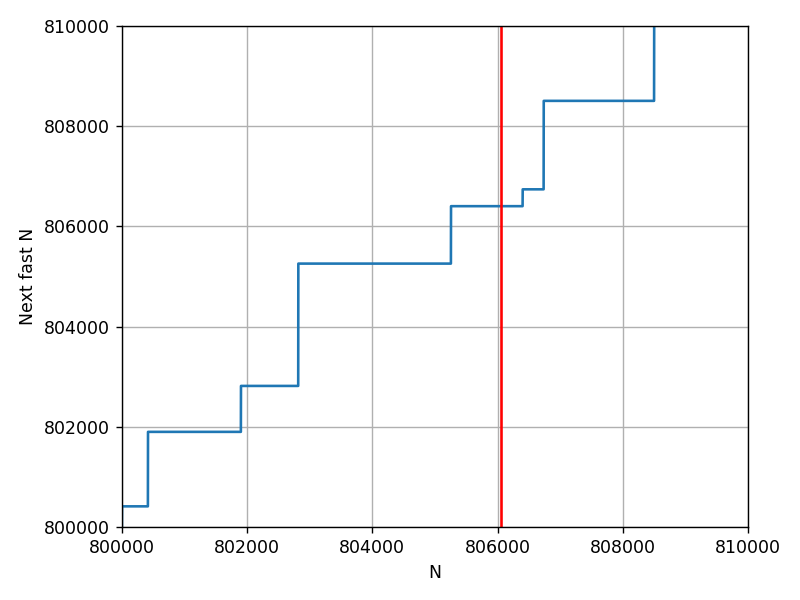

In [9]:
%matplotlib notebook
N=2**20
L=np.zeros(N)
for k in range(N):
    L[k]=scipy.fft.next_fast_len(k)
plt.plot(L)
plt.xlim([800000, 810000])
plt.ylim([800000, 810000])
plt.axvline(806057, c='r')
plt.xlabel("N")
plt.ylabel("Next fast N")
plt.grid()
plt.tight_layout()
plt.show()

## scipy.signal.convolve

https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve.html

```scipy.signal.convolve(in1, in2, mode='full', method='auto')```

Convolve two N-dimensional arrays.

Convolve `in1` and `in2`, with the output size determined by the mode argument.

**Parameters**
* `in1` *array_like* First input.

* `in2` *array_like* Second input. Should have the same number of dimensions as `in1`.

* `mode` *str* {`full`, `valid`, `same`}, *optional* A string indicating the size of the output:

* * `full` The output is the full discrete linear convolution of the inputs. (Default)

* * `valid` The output consists only of those elements that do not rely on the zero-padding. In `valid` mode, either `in1` or `in2` must be at least as large as the other in every dimension.

* * `same` The output is the same size as in1, centered with respect to the `full` output.

* `method` *str* {`auto`, `direct`, `fft`}, *optional* A string indicating which method to use to calculate the convolution.

* * `direct` The convolution is determined directly from sums, the definition of convolution.

* * `fft` The Fourier Transform is used to perform the convolution by calling fftconvolve.

* * `auto` Automatically chooses direct or Fourier method based on an estimate of which is faster (default). New in version 0.19.0.

**Returns**

* `convolve` *array* An N-dimensional array containing a subset of the discrete linear convolution of `in1` with `in2`.

**Warns**
* `RuntimeWarning` Use of the FFT convolution on input containing NAN or INF will lead to the entire output being NAN or INF. Use method=`direct` when your input contains NAN or INF values.

In [10]:
N=2**19
x = np.random.normal(0, 0.1, N)
h = np.random.normal(0, 0.1, N)
N

524288

In [11]:
start=time.time()
y=signal.convolve(x, h, method='fft')
time2=time.time()
print(time2-start, "c")

0.08573532104492188 c


In [12]:
start=time.time()
signal.convolve(x, h, method='direct')
time2=time.time()
print(time2-start, "c")

15.578523397445679 c
